In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# （1）导入titanic.csv数据集，显示前5条数据
titanic_data = pd.read_csv('./data/titanic.csv')
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


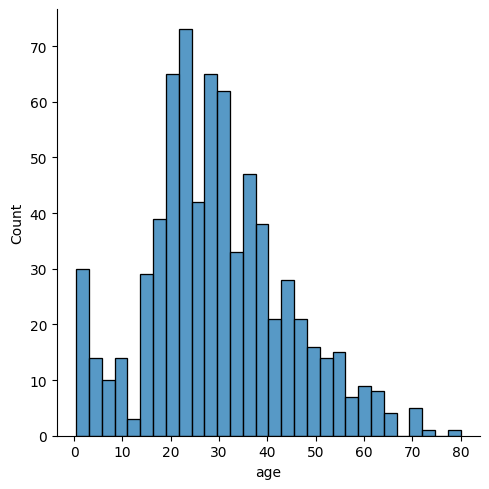

In [2]:
# （2）使用seaborn包的displot函数，进行年龄分布的可视化
sns.displot(titanic_data['age'].dropna(), kde=False, bins=30)

<Axes: xlabel='sex', ylabel='age'>

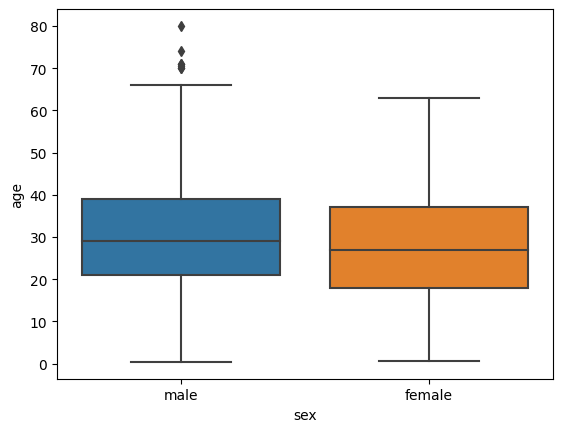

In [3]:
# （3）基于性别，绘制乘客年龄分布箱线图
sns.boxplot(x='sex', y='age', data=titanic_data)

<Axes: xlabel='pclass', ylabel='age'>

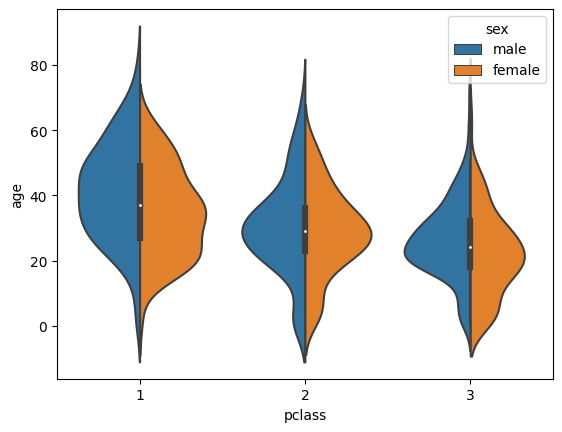

In [4]:
# （4）结合船舱等级，绘制乘客年龄分布的小提琴图
sns.violinplot(x='pclass', y='age', hue='sex', data=titanic_data, split=True)

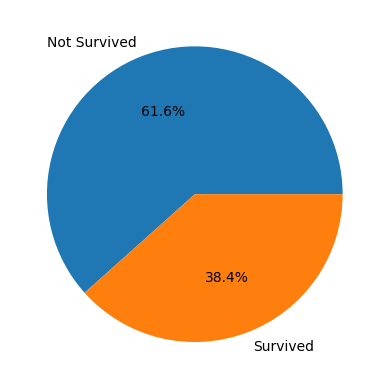

In [5]:
# （5）泰坦尼克号乘客生还几率饼图
survival_rates = titanic_data['survived'].value_counts(normalize=True)
plt.pie(survival_rates, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.show()


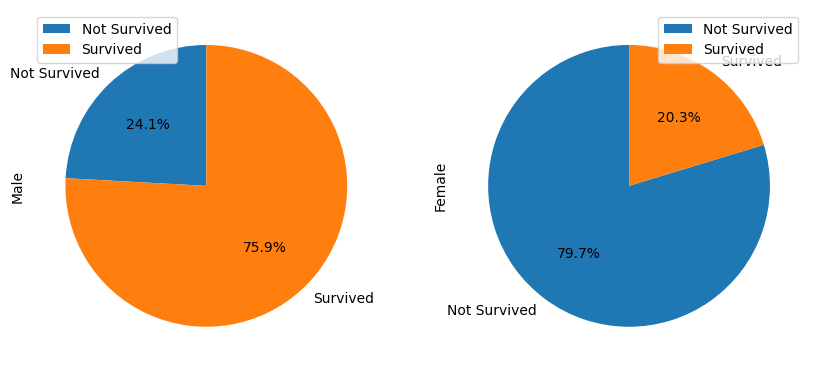

In [6]:
# （6）不同性别乘客的生还情况
# 分别计算男性和女性的生还率
survival_rates_by_sex = titanic_data.groupby('sex')['survived'].value_counts(normalize=True).unstack()

# 绘制饼图
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
survival_rates_by_sex.plot.pie(subplots=True, ax=axes, autopct='%1.1f%%', startangle=90, labels=['Not Survived', 'Survived'])
axes[0].set_ylabel('Male')
axes[1].set_ylabel('Female')
plt.show()


# sns.countplot(x='sex', hue='survived', data=titanic_data)
# plt.show()